<a href="https://colab.research.google.com/github/sky-m1618/PROJECT_1/blob/main/P3_Image_to_cartoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [8]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    # plt.axes('off')
    plt.show()
    return img


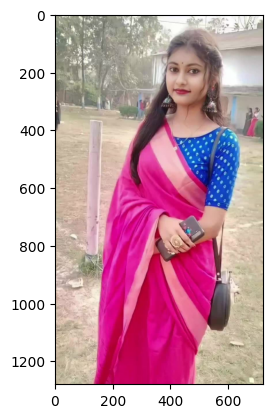

In [49]:
file = read_file('girl.jpg')

#Create Edge Mask

In [50]:
def edge_mask(img,line_size , blur_value):
    gray = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray , blur_value)

    edges = cv2.adaptiveThreshold(gray_blur , 255 ,cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY , line_size,blur_value)

    return edges

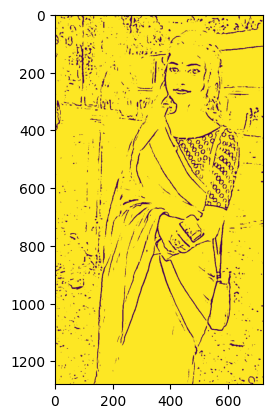

In [82]:
edge_file = edge_mask(file , 9,7)
plt.imshow(edge_file)
plt.show()


In [52]:
def color_quantization(img , k):
    data = np.float32(img).reshape((-1,3))

    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)

    ret , label , center = cv2.kmeans(data , k , None , criteria , 10 , cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result


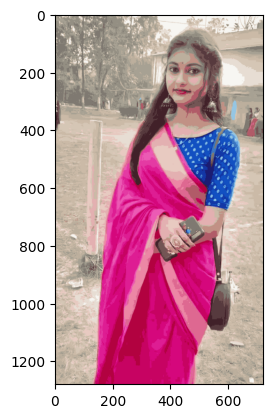

In [70]:

reduced_color_image = color_quantization(file , 30)
plt.imshow(reduced_color_image)
plt.show()


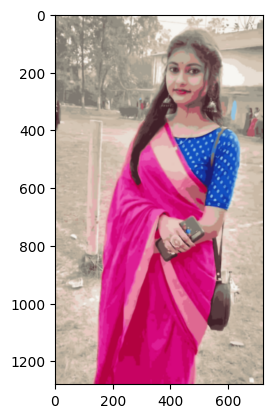

In [71]:
from cv2.detail import BundleAdjusterReproj
blurred = cv2.bilateralFilter(reduced_color_image , d = 7 , sigmaColor=200 , sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [83]:
def cartoon():
    c = cv2.bitwise_and(blurred,blurred,mask = edge_file)

    plt.imshow(c)
    plt.show()


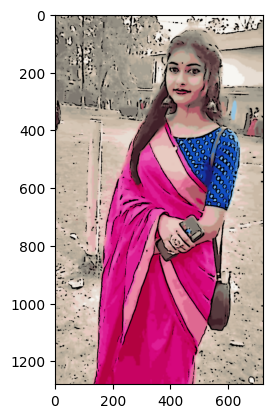

In [84]:
cartoon()

In [86]:
def convert_Image(filename , line_size,blur_value , nOF_color):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    file = edge_mask(img , line_size , blur_value)
    img_quantized = color_quantization(img,nOF_color)
    blurred = cv2.bilateralFilter(img_quantized , d = 7 , sigmaColor=200 , sigmaSpace=200)
    cartoon_img = cv2.bitwise_and(blurred,blurred,mask = file)
    plt.imshow(img)
    plt.title('Original')
    plt.show()

    plt.imshow(cartoon_img)
    plt.title('Cartoon Image')
    plt.show()

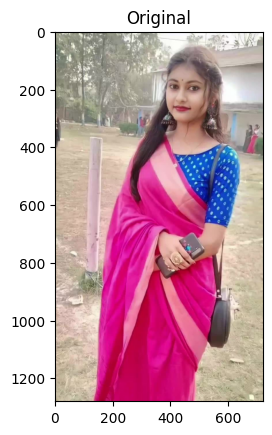

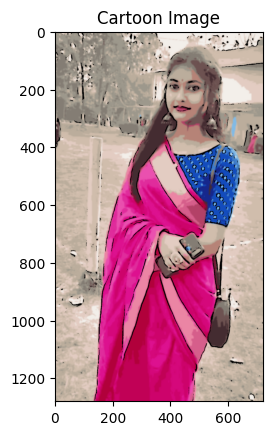

In [87]:
convert_Image(filename = 'girl.jpg' , line_size = 9,blur_value = 9 , nOF_color = 24)

In [88]:
import gradio as gr

def convert_Image_gr(image, line_size, blur_value, nOF_color):
    # The convert_Image function already handles saving and displaying,
    # but for Gradio we need to return the modified image.
    # Let's reuse the existing logic and return the cartoon image.
    img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Gradio passes RGB, convert to BGR for cv2.imread logic
    file = edge_mask(image , line_size , blur_value)
    img_quantized = color_quantization(image,nOF_color)
    blurred = cv2.bilateralFilter(img_quantized , d = 7 , sigmaColor=200 , sigmaSpace=200)
    cartoon_img = cv2.bitwise_and(blurred,blurred,mask = file)
    return cartoon_img

# Define the Gradio interface
interface = gr.Interface(
    fn=convert_Image_gr,
    inputs=[
        gr.Image(type="numpy", label="Upload Image"),
        gr.Slider(minimum=1, maximum=25, step=2, value=9, label="Line Size"),
        gr.Slider(minimum=1, maximum=25, step=2, value=7, label="Blur Value"),
        gr.Slider(minimum=2, maximum=64, step=1, value=24, label="Number of Colors")
    ],
    outputs="image",
    title="Image to Cartoon Converter",
    description="Upload an image and adjust parameters to cartoonize it."
)

# Launch the interface
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5b2555dabd82647498.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
